In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
import scipy.stats as stats

In [78]:
### reading the CSV file

claim_data = pd.read_csv('D:\DATA SC\python\Analytix lab assignments\Python Foundation Case Study 3 - Insurance Claims Case Study/claims.csv')
claim_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [79]:
cust_data=pd.read_csv('D:\DATA SC\python\Analytix lab assignments\Python Foundation Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')
cust_data.rename(columns={'CUST_ID':"customer_id"},inplace=True)
cust_data

,customer_id,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


### Data Type Change as per requirements

In [80]:
claim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [81]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [82]:
claim_data['claim_date']= pd.to_datetime(claim_data['claim_date'],format = "%m/%d/%Y")

In [83]:
## Change the data type of the Claim date & Date of Birth Column

claim_data['claim_date']= pd.to_datetime(claim_data['claim_date'],format = "%m/%d/%Y")
cust_data["DateOfBirth"] = pd.to_datetime(cust_data.DateOfBirth, format = "%d-%b-%y")
cust_data.loc[(cust_data.DateOfBirth.dt.year > 2020),"DateOfBirth"]=cust_data[cust_data.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))

#### Convert the Claim Amount column to numeric after removing the '$' 

In [84]:

claim_data['claim_amount'] = claim_data['claim_amount'].str.replace('$','')
claim_data['claim_amount']= claim_data['claim_amount'].astype(float)

C:\Users\HP\AppData\Local\Temp\ipykernel_5012\2475827499.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  claim_data['claim_amount'] = claim_data['claim_amount'].str.replace('$','')


In [85]:
claim_data.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes


### DATA audit & 360 View of the uploaded data

In [86]:
### Data Type recheck
claim_data.info()
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   int64         
 1   customer_id          1100 non-null   int64         
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1035 non-null   float64       
 8   total_policy_claims  1090 non-null   float64       
 9   fraudulent           1100 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 86.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non

In [87]:
claim_data.describe()
claim_data['customer_id'].nunique() ### To undersatnds whether the claim data consists of unique customer ID or not

1093

In [88]:
cust_data.describe() ## All the data are catagorical data.

,customer_id
count,1.085000e+03
mean,5.084410e+07
std,2.847987e+07
min,1.545570e+05
25%,2.673472e+07
50%,4.982065e+07
75%,7.599506e+07
max,9.996199e+07


### FLAG for the Injury type claim where police report = No

In [89]:
injury_claim_No_report = claim_data.loc[(claim_data['claim_type']=='Injury only') & (claim_data['police_report']=='No')]
injury_claim_No_report.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
5,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes
17,7809917,63916778,Other causes,2017-07-22,Auto,No,Injury only,17800.0,1.0,No


In [90]:
claim_data['Flag']=0
claim_data.loc[(claim_data['claim_type']=='Injury only') & (claim_data['police_report']=='No'),'Flag']=1
claim_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,0
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,0
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,0
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,0


In [91]:
### All Injury & Non reported data is marked as FLAGGED= 1

claim_data.loc[(claim_data['claim_type']=='Injury only') & (claim_data['police_report']=='No')]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
5,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,1
17,7809917,63916778,Other causes,2017-07-22,Auto,No,Injury only,17800.0,1.0,No,1
18,29205389,17004138,Natural causes,2017-06-25,Auto,No,Injury only,31380.0,1.0,No,1
29,18210740,80379865,Natural causes,2018-02-09,Auto,No,Injury only,18580.0,NaN,No,1
37,13167216,27205554,Driver error,2018-05-14,Auto,No,Injury only,16910.0,1.0,No,1
...,...,...,...,...,...,...,...,...,...,...,...
995,704775,86088574,Driver error,2017-09-20,Auto,No,Injury only,40951.5,1.0,Yes,1
1032,99300549,91002298,Natural causes,2017-04-05,Auto,No,Injury only,34010.0,1.0,No,1
1041,11179944,41946743,Other driver error,2018-05-21,Auto,No,Injury only,17870.0,6.0,No,1
1062,85546357,90217818,Other driver error,2017-06-04,Auto,No,Injury only,37743.0,1.0,Yes,1


In [92]:
### Checking the duplicate values on Customer ID.

duplicated_CustID= claim_data[claim_data.duplicated('customer_id')]
duplicated_CustID

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
620,78221963,84147585,Driver error,2018-04-10,Auto,Yes,Injury only,14430.0,4.0,No,0
621,1654201,85357756,Driver error,2018-06-23,Auto,Unknown,Material only,2510.0,1.0,No,0
622,41779510,53539195,Driver error,2018-10-03,Home,No,Injury only,25040.0,1.0,No,1
629,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0
630,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,0
631,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,0
632,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,0


In [93]:
### Checking of the duplicate claim data

duplicated_CustID= claim_data[claim_data.duplicated('claim_id')]
duplicated_CustID

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag


In [94]:
#### Merge the Cust_data & the claim data -

cust_claim_data = pd.merge(claim_data,cust_data,how='inner',on=['customer_id'])
cust_claim_data.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0,Female,1984-03-11,TN,798-631-4758,Silver


In [95]:
### Drop the dupcates on the basis of the customer_id
cust_claim_data.drop_duplicates(subset=['customer_id'],inplace=True)
cust_claim_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0,Female,1986-05-01,MA,413-187-7945,Silver
6,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,0,Male,1977-05-13,NV,956-871-8691,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,0,Female,1981-03-15,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,0,Female,1996-07-07,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,0,Male,1990-04-11,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,0,Female,1964-10-22,LA,469-345-5617,Silver


### Replacement of the Missing value 

In [96]:
cust_claim_data.isnull().sum()

## Only Claim_amount & Total Policy Claim seems to have duplicate value

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
Flag                    0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
dtype: int64

In [97]:
### replace the Null values of claim amount & total_policy_claims

claim_amount_mean= cust_claim_data['claim_amount'].mean()
policy_claim_mean= cust_claim_data['total_policy_claims'].mean()

cust_claim_data['claim_amount'].fillna(value=claim_amount_mean,inplace=True)
cust_claim_data['total_policy_claims'].fillna(value=policy_claim_mean,inplace=True)

cust_claim_data.isnull().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
Flag                   0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
dtype: int64

### Customer Age wise segmentation

In [98]:
from datetime import date as dt
def age(born):  
    today = dt.today()
    return today.year - born.year - ((today.month,today.day) < (born.month,born.day));


cust_claim_data['Age']= cust_claim_data['DateOfBirth'].apply(age)

### Creating Bins for Age catagories -

cust_claim_data.loc[cust_claim_data['Age'].between(0, 17, 'both'),'Age_grp']='Children'
cust_claim_data.loc[cust_claim_data['Age'].between(18, 30, 'right'),'Age_grp']='Youth'
cust_claim_data.loc[cust_claim_data['Age'].between(30, 60, 'right'),'Age_grp']='Adult'
cust_claim_data.loc[cust_claim_data['Age'].between(60,150 , 'right'),'Age_grp']='Senior'

cust_claim_data.head(2)


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,gender,DateOfBirth,State,Contact,Segment,Age,Age_grp
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,Female,1979-01-12,VT,789-916-8172,Platinum,44,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0,Female,1970-01-13,ME,265-543-1264,Silver,53,Adult


### Avg Amount Claimed by Customers of different Age Group

In [99]:
cust_claim_data.pivot_table(index='Age_grp',values= 'claim_amount',aggfunc= 'mean')

,claim_amount
Age_grp,
Adult,12503.694399
Senior,13610.607698
Youth,12102.660760


### Claim amount based on the incident cause- logged min 20days before 1st Oct,2018

In [100]:
### Complaint day before 1st Oct,2018
### cut off date = Min 20 days before 1st Oct,2018 = 10/09/2018

cust_claim_data.loc[cust_claim_data['claim_date']<'2018-9-10'].pivot_table(index='incident_cause',values='claim_amount')

,claim_amount
incident_cause,
Crime,7317.802956
Driver error,13949.940095
Natural causes,7632.011550
Other causes,14550.931531
Other driver error,14556.168775


In [101]:
cust_claim_data.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,gender,DateOfBirth,State,Contact,Segment,Age,Age_grp
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,Female,1979-01-12,VT,789-916-8172,Platinum,44,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0,Female,1970-01-13,ME,265-543-1264,Silver,53,Adult


### How many adults from TX/DE/AK claimed inusrance for the driver related issues

In [102]:
adult_claim_due_to_driver=cust_claim_data.loc[((cust_claim_data['State']=='TX') | (cust_claim_data['State']=='DE') |(cust_claim_data['State']=='AK')) & (cust_claim_data['Age_grp']=='Adult') & (cust_claim_data['incident_cause']=='Driver error')]
adult_claim_due_to_driver.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,gender,DateOfBirth,State,Contact,Segment,Age,Age_grp
103,82144259,92752865,Driver error,2017-04-25,Auto,No,Injury only,12470.498519,1.0,No,1,Male,1986-01-30,AK,143-219-5498,Silver,36,Adult
187,21550521,68772500,Driver error,2018-08-30,Auto,Unknown,Material only,2320.000000,1.0,No,0,Male,1989-11-10,TX,562-259-5432,Silver,33,Adult


In [103]:
### Count of claim
adult_claim_due_to_driver['claim_id'].count()

17

### Gender wise product wise segmentation

array([<AxesSubplot:ylabel='Female'>, <AxesSubplot:ylabel='Male'>],
      dtype=object)

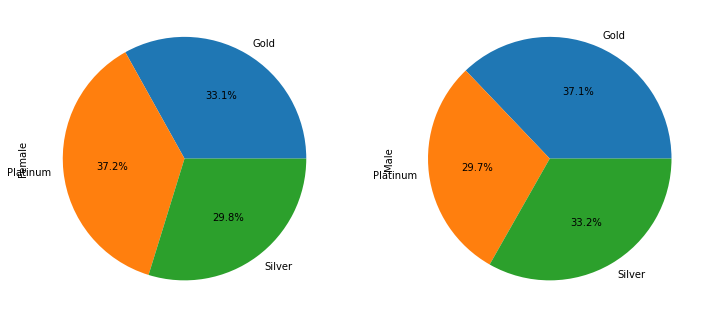

In [104]:
Segment_gender_wise_claim=cust_claim_data.pivot_table(index='Segment',values='claim_amount',columns=['gender'],aggfunc='sum')/cust_claim_data['claim_amount'].sum()
Segment_gender_wise_claim.plot(kind="pie", subplots= True, legend= False,figsize=(12,6),autopct='%1.1f%%')

#### Need to learn how i can plot the above plot in coaxial single pie chart.

### Gender Wise Claim due to Driver Issue

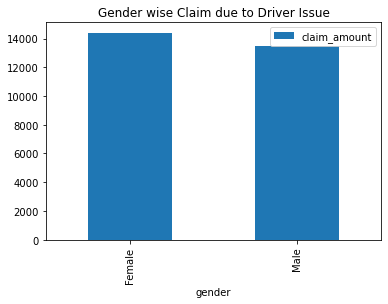

In [105]:
cust_claim_data.loc[cust_claim_data['incident_cause']=="Driver error"].pivot_table(index='gender',values='claim_amount').plot(kind='bar')
plt.title('Gender wise Claim due to Driver Issue')
plt.show()

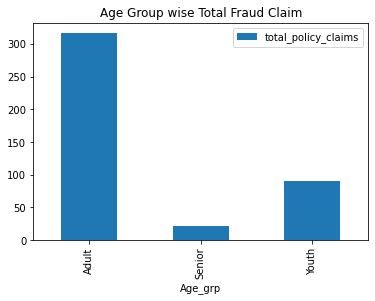

In [106]:
cust_claim_data.loc[cust_claim_data['fraudulent']=='Yes'].pivot_table(index='Age_grp',values='total_policy_claims',aggfunc='sum').plot(kind='bar')
plt.title('Age Group wise Total Fraud Claim')
plt.show()


In [107]:
cust_claim_data.head(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,gender,DateOfBirth,State,Contact,Segment,Age,Age_grp
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,Female,1979-01-12,VT,789-916-8172,Platinum,44,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0,Female,1970-01-13,ME,265-543-1264,Silver,53,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0,Female,1984-03-11,TN,798-631-4758,Silver,38,Adult
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0,Female,1986-05-01,MA,413-187-7945,Silver,36,Adult
6,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,0,Male,1977-05-13,NV,956-871-8691,Gold,45,Adult


### Month Wise Claim Amount

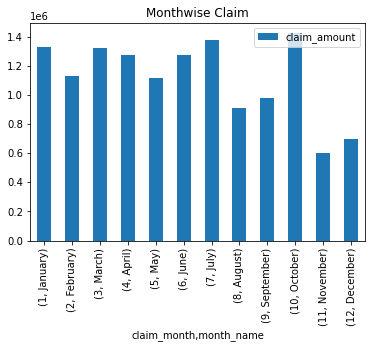

In [108]:
month_wise_claim = cust_claim_data
month_wise_claim['claim_month'] = pd.DatetimeIndex(month_wise_claim['claim_date']).month
month_wise_claim['month_name']= pd.DatetimeIndex(month_wise_claim['claim_date']).month_name(locale='English')
### why this locale= 'english' is to be put to get the exact name of the month.
month_wise_claim.pivot_table(index=['claim_month','month_name'],values='claim_amount',aggfunc='sum').plot(kind='bar')
plt.title('Monthwise Claim')
plt.show()

### Avg Claim Gender wise/ Age Group Wise/Fraudulent wise

<AxesSubplot:xlabel='Age_grp', ylabel='claim_amount'>

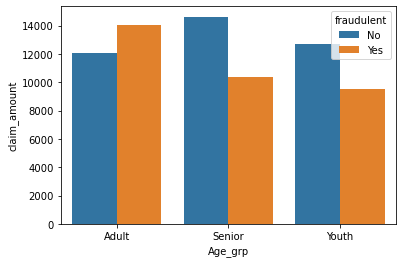

In [245]:
### Age_grp wise Claim - 
age_fraud_wise_claim =cust_claim_data.pivot_table(index=['Age_grp','fraudulent'],values='claim_amount',aggfunc='mean').reset_index()
sns.barplot(data=age_fraud_wise_claim, y='claim_amount',x='Age_grp',hue='fraudulent')

<AxesSubplot:xlabel='gender', ylabel='claim_amount'>

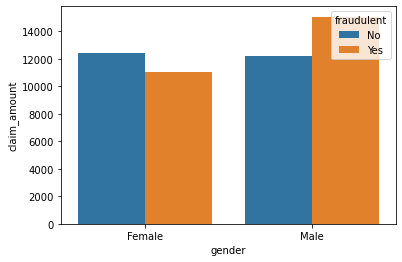

In [254]:
### Gender wise claim -
gender_fraud_wise_claim =cust_claim_data.pivot_table(index=['gender','fraudulent'],values='claim_amount',aggfunc='mean').reset_index()
sns.barplot(data=gender_fraud_wise_claim,y='claim_amount',x='gender',hue='fraudulent')


In [122]:
cust_claim_data.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,gender,DateOfBirth,State,Contact,Segment,Age,Age_grp,claim_month,month_name
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,Female,1979-01-12,VT,789-916-8172,Platinum,44,Adult,11,November
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0,Female,1970-01-13,ME,265-543-1264,Silver,53,Adult,10,October


In [123]:
claim_data.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0


### Is there any similarity in the amount claimed by males and females?

<AxesSubplot:xlabel='claim_amount', ylabel='Count'>

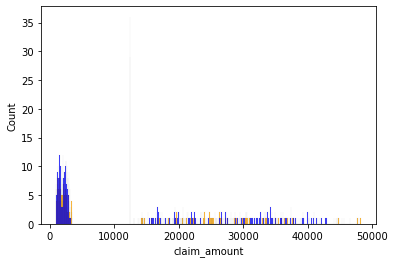

In [135]:
### Histogram Plot for understanding the reation between the male & Female cllaim
Female_cust_claim = cust_claim_data.loc[cust_claim_data['gender']=='Female',['claim_amount']]
male_cust_claim= cust_claim_data.loc[cust_claim_data['gender']=='Male',['claim_amount']]
sns.histplot(Female_cust_claim.claim_amount,color= 'orange',label='Female_claim',bins=1050)
sns.histplot(male_cust_claim.claim_amount,color= 'blue',label='Female_claim',bins=1050)

In [141]:
## Ttest for the male & Female claim :

## H0 = we assume that there is a similarity between Male_claim & Female_claim.
stats.ttest_ind(male_cust_claim.claim_amount,Female_cust_claim.claim_amount)

## as the P value is high we cant reject the null hypothesis.

-0.8848703612768547

### Is there any relationship between age category and segment?

In [154]:
### Relationship between age catagory & segment :

## As both the data is catagorical data, to understand the relation between them we have to use Chi_sqaure contigency test -

### H0 = The catagorical variable- Age group & Segment is independent.

observed= pd.crosstab(cust_claim_data.Age_grp,cust_claim_data.Segment)
stats.chi2_contingency(observed)

### As the P value is high H0 cannot be rejected. Heve they are likely to independent

(1.183740169137463,
 0.8807683692139354,
 4,
 array([[274.29220779, 266.89888683, 255.80890538],
        [ 17.55194805,  17.07884972,  16.36920223],
        [ 79.15584416,  77.02226345,  73.82189239]]))

In [155]:
cust_claim_data.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,Flag,gender,DateOfBirth,State,Contact,Segment,Age,Age_grp,claim_month,month_name
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0,Female,1979-01-12,VT,789-916-8172,Platinum,44,Adult,11,November
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,0,Female,1970-01-13,ME,265-543-1264,Silver,53,Adult,10,October


### The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10000

In [188]:
#### Cust Claim relation of the year 2017 & 2018

claim_2016_2017=cust_claim_data.loc[(cust_claim_data['claim_date']>'2016-04-01')&(cust_claim_data['claim_date']<'2017-03-31'),['claim_date','claim_amount']]
claim_2018 = cust_claim_data.loc[(cust_claim_data['claim_date']>'2018-01-01')&(cust_claim_data['claim_date']<'2019-01-01'),['claim_date','claim_amount']]


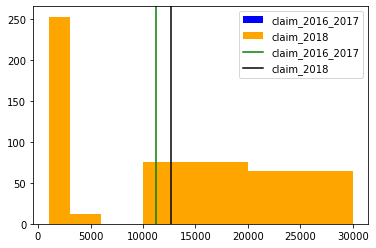

In [211]:
## Hist Plot for the 2 different year Claim -

plt.hist(claim_2016_2017.claim_amount,color='blue',bins=[1000,3000,6000,8000,10000,20000,30000],label= "claim_2016_2017")
plt.hist(claim_2018.claim_amount,color='orange',bins=[1000,3000,6000,8000,10000,20000,30000],label= "claim_2018")
plt.axvline(claim_2016_2017.claim_amount.mean(),color='green',label= "claim_2016_2017")
plt.axvline(claim_2018.claim_amount.mean(),color='black',label= "claim_2018")
plt.legend()

In [212]:
claim_2018.claim_amount.mean()
claim_2016_2017.claim_amount.mean()

11268.730240210594

###### Is there any difference between age group wise Claim ??


In [169]:
adult_claim= cust_claim_data.loc[cust_claim_data['Age_grp']=='Adult',['claim_amount']]
Senior_claim = cust_claim_data.loc[cust_claim_data['Age_grp']=='Senior',['claim_amount']]
Youth_claim = cust_claim_data.loc[cust_claim_data['Age_grp']=='Youth',['claim_amount']]

### H0= all the claims are independent of three age group ( i.e Means are same)
### H1 = there are some effects of the age group on claim (i.e at least 1 Mean is not same)

stats.f_oneway(adult_claim,Senior_claim,Youth_claim)

## as the p value is more than .05, we are unable to reject the H0 hypothesis.there is no difference in age wise claim.

F_onewayResult(statistic=array([0.274735]), pvalue=array([0.75982677]))

#### Is there any relation between total policy number & Policy claim amount

In [171]:
stats.pearsonr(cust_claim_data.total_policy_claims,cust_claim_data.claim_amount)

### as the p vaue is more than 0.5 hence we can say there is some relation in between these 2 variable..

(-0.014291136186627362, 0.6392846937920396)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_policy_claims', ylabel='claim_amount'>

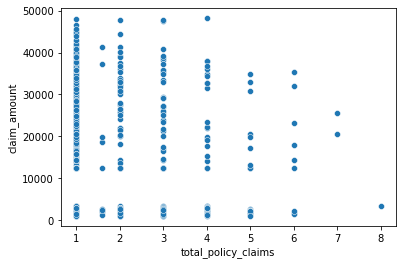

In [172]:
sns.scatterplot(cust_claim_data.total_policy_claims,cust_claim_data.claim_amount)